In [2]:
from keras.datasets import imdb

C:\Users\ASUS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()

In [5]:
reversed_word_index = dict([(v,k)for (k,v) in word_index.items()])
print (' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,seqence in enumerate(sequences):
        results[i, seqence] = 1.
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=8,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/8
15000/15000 [==============================] - 5s 302us/step - loss: 0.6339 - acc: 0.6837 - val_loss: 0.5678 - val_acc: 0.8271
Epoch 2/8
15000/15000 [==============================] - 3s 222us/step - loss: 0.5273 - acc: 0.7977 - val_loss: 0.4811 - val_acc: 0.8354
Epoch 3/8
15000/15000 [==============================] - 3s 213us/step - loss: 0.4576 - acc: 0.8249 - val_loss: 0.4120 - val_acc: 0.8748
Epoch 4/8
15000/15000 [==============================] - 3s 213us/step - loss: 0.4025 - acc: 0.8533 - val_loss: 0.3723 - val_acc: 0.8723
Epoch 5/8
15000/15000 [==============================] - 3s 215us/step - loss: 0.3589 - acc: 0.8803 - val_loss: 0.3343 - val_acc: 0.8892
Epoch 6/8
15000/15000 [==============================] - 3s 215us/step - loss: 0.3203 - acc: 0.8989 - val_loss: 0.3163 - val_acc: 0.8859
Epoch 7/8
15000/15000 [==============================] - 3s 219us/step - loss: 0.2906 - acc: 0.9123 - val_loss: 0.3004 - val_acc

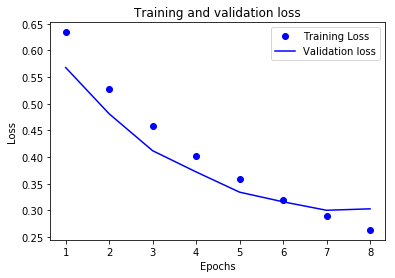

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

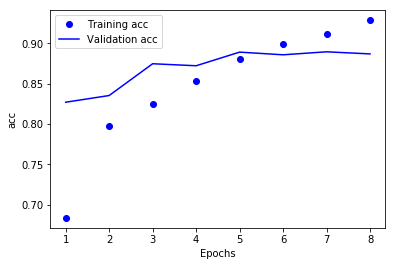

In [14]:
plt.clf()
val_acc_value = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_value, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [16]:
results

[0.3239850415039062, 0.87268]

In [17]:
model.predict(x_test)

array([[0.13739187],
       [0.99968755],
       [0.30162823],
       ...,
       [0.07073343],
       [0.04303792],
       [0.47098666]], dtype=float32)

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 6s 257us/step - loss: 0.4562 - acc: 0.8112
Epoch 2/4
25000/25000 [==============================] - 4s 171us/step - loss: 0.2543 - acc: 0.9098 
Epoch 3/4
25000/25000 [==============================] - 4s 173us/step - loss: 0.1947 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 4s 172us/step


In [19]:
results

[0.30138831684589384, 0.883]

In [20]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 6s 227us/step - loss: 0.4399 - acc: 0.8151
Epoch 2/4
25000/25000 [==============================] - 5s 208us/step - loss: 0.2430 - acc: 0.9083
Epoch 3/4
25000/25000 [==============================] - 5s 206us/step - loss: 0.1875 - acc: 0.9313
Epoch 4/4
25000/25000 [==============================] - 5s 202us/step


In [21]:
results

[0.359429310297966, 0.87004]

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
25000/25000 [==============================] - 9s 341us/step - loss: 0.4384 - acc: 0.7922
Epoch 2/6
25000/25000 [==============================] - 6s 247us/step - loss: 0.2407 - acc: 0.9060
Epoch 3/6
25000/25000 [==============================] - 6s 232us/step - loss: 0.1850 - acc: 0.9289
Epoch 4/6
25000/25000 [==============================] - 6s 231us/step - loss: 0.1412 - acc: 0.9474
Epoch 5/6
25000/25000 [==============================] - 6s 255us/step - loss: 0.1053 - acc: 0.9629
Epoch 6/6
25000/25000 [==============================] - 6s 250us/step


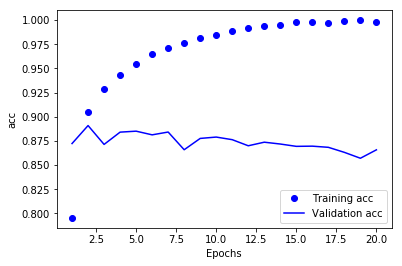

In [23]:
plt.clf()
val_acc_value = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_value, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()